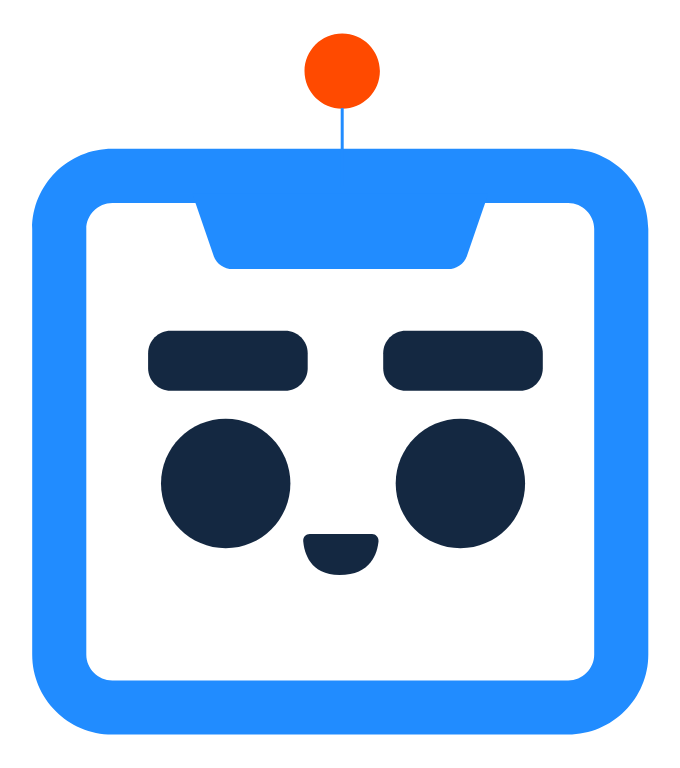

# Exploring Chaos: A Fun Dive into Chaos Math

Welcome to my mathematical playground! In this notebook, I'm exploring the fascinating world of chaos theory, where simple equations lead to beautifully complex and unpredictable patterns.

Chaos math is all about finding order in apparent randomness, and there's no better way to explore it than through the logistic map—a classic model that shows how deterministic systems can behave chaotically.

Let the exploration begin!

In [1]:
# import libs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt
import sympy as sp
from sympy import symbols
sns.set(style="whitegrid", context="talk")

In [ ]:
# Convert image to Base64 - doing this once just have the icon in the top markdown
import base64

with open("kuberticon.png", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode('utf-8')
    print(encoded_string)

## Staring Point

The logistic map is an excellent starting point for exploring chaos theory because it is a simple yet illustrative example of how complex, chaotic behaviour can arise from deterministic systems.

## Logistic Map Equation

[https://en.wikipedia.org/wiki/Logistic_map](https://en.wikipedia.org/wiki/Logistic_map)

A simple, recursive equation defines the logistic map:

$$
y_{n+1} = r \cdot y_n \cdot (1 - y_n)
$$

Despite its simplicity, this equation can produce highly complex and unpredictable behaviours, especially as the parameter r is varied. This makes it a perfect entry point for studying chaos, as it allows us to see how intricate patterns and chaos emerge from straightforward mathematical rules.

### Parameters:
- \( y_n \): The value of the system at iteration \( n \).
- \( r \): A parameter that controls the system's behaviour.

### Behavior Based on \( r \):
- **\( 0 < r <= 1 \)**: The system converges to a fixed point.
- **\( 1 < r <= 3 \)**: The system converges to a periodic cycle.
- **\( r > 3 \)**: The system may exhibit chaotic behaviour, where small changes in initial conditions can lead to vastly different outcomes.

In [2]:
# Initialize empty lists to store the values of r and the state x after the transient period
r_b = []
x_b = []

# Define the number of points for the simulation
points_n = 100

# Generate the bifurcation diagram by examining the system's behaviour for different r_n values
for r_n in np.arange(0,4,0.001):
    
    # Initialize an array y_b of zeros with a length equal to points_b
    y_n = np.zeros(points_n)

    # Set the initial value of the state to 0.1
    y_n[0] = 0.1

    # Generate values based on the logistic map equation
    for i in range(1,points_n):
        
        # Apply the logistic map equation to calculate the next state
        y_n[i] = r_n * y_n[i-1] * (1 - y_n[i-1])
        
        if i >= int(points_n/2):
            r_b.append(r_n)
            x_b.append(y_n[i])

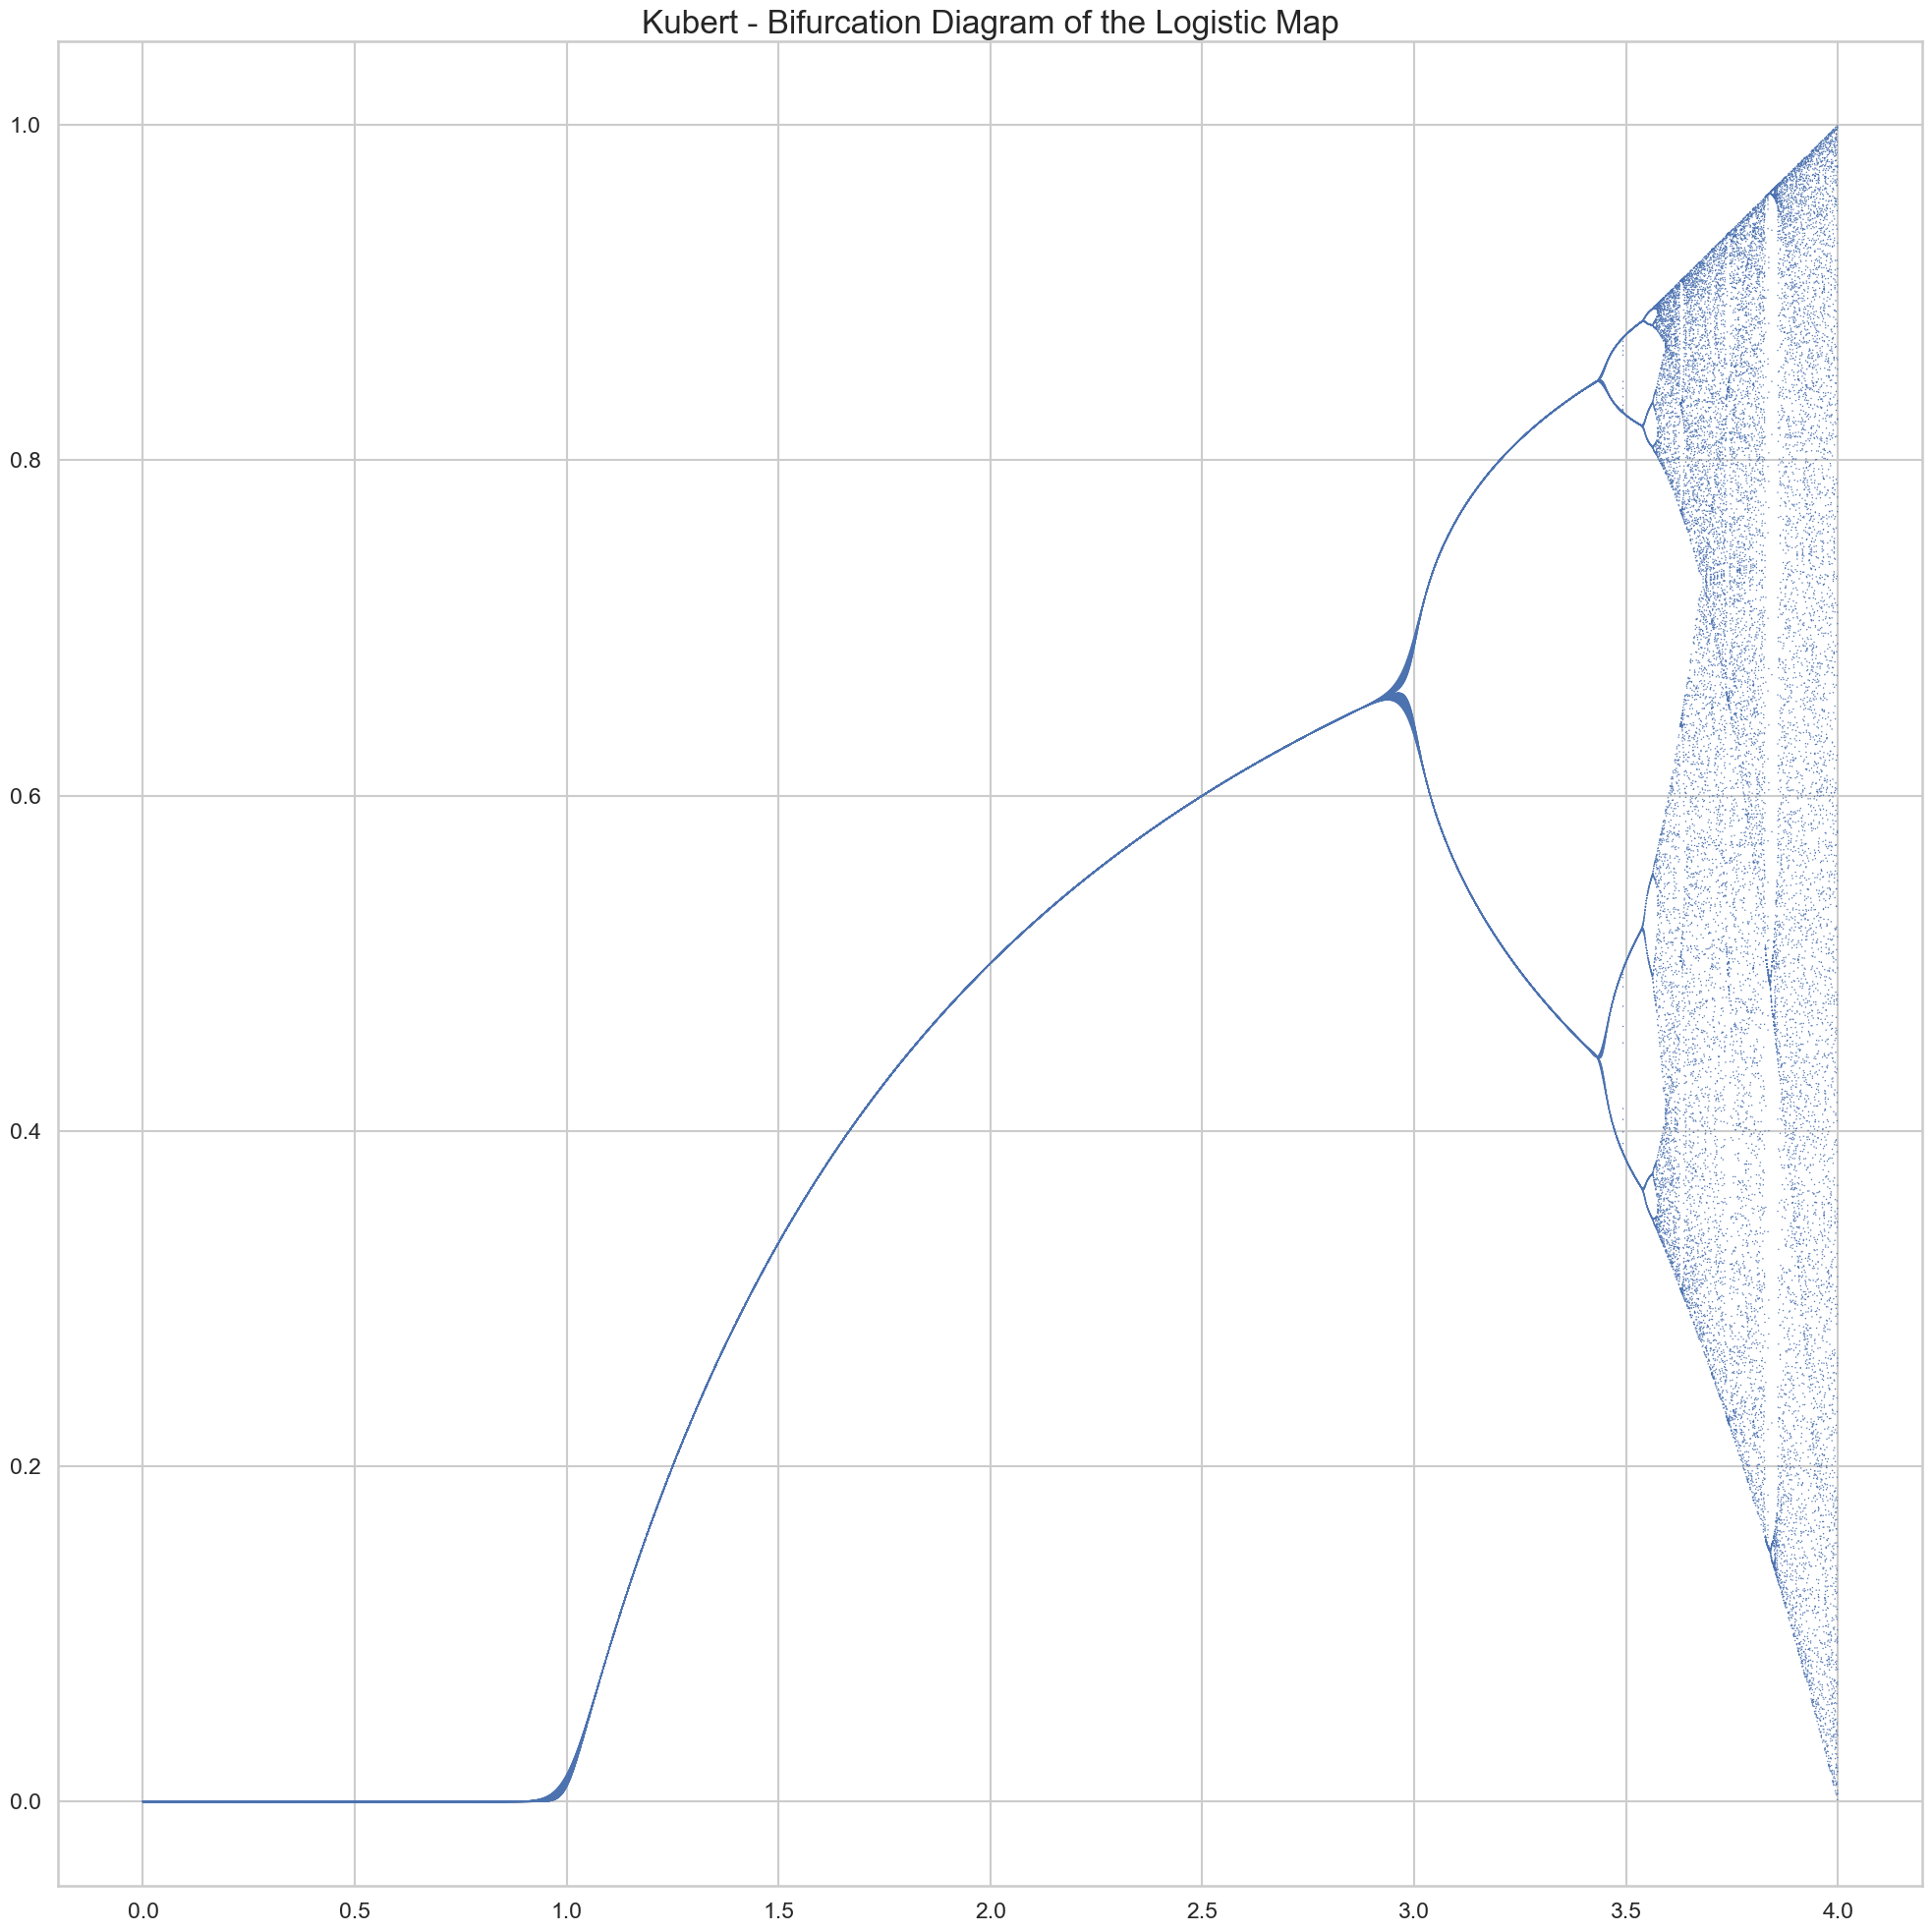

In [3]:
plt.figure(figsize=(20,20))
plt.scatter(r_b,x_b,edgecolor='None', alpha=1, s=1)
plt.title('Kubert - Bifurcation Diagram of the Logistic Map', fontsize=24)
plt.tight_layout()
plt.savefig("chaos.png",dpi=150)
plt.show()

# Newton Fractals

Newton's fractals and the logistic map are fascinating aspects of chaos theory.

[https://en.wikipedia.org/wiki/Newton_fractal](https://en.wikipedia.org/wiki/Newton_fractal)

The fractals are generated by iterating Newton's method, starting from different points in the complex plane and then mapping these points based on the root they converge to.

Newton's method is an iterative process used to approximate the roots of a real-valued or complex-valued function. Given a function \( f(z) \) and its derivative \( f'(z) \), the method uses the following iteration:

$$
z_{n+1} = z_n - \frac{f(z_n)}{f'(z_n)}
$$

Here, \( z_n \) is the current estimate of the root, and \( z_{n+1} \) is the next estimate.

In [4]:
# Generalized Newton's method iteration
def newton_method(z, f, f_prime, max_iter=50, tol=1e-6, *args, **kwargs):
    for i in range(max_iter):
        z_next = z - f(z, *args, **kwargs) / f_prime(z, *args, **kwargs)
        if abs(z_next - z) < tol:
            break
        z = z_next
    return z

# Generalized function to generate the fractal
def newton_fractal(xmin, xmax, ymin, ymax, width, height, f, f_prime, roots, max_iter=50, *args, **kwargs):
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y
    
    # Apply Newton's method to each point in the complex plane
    fractal = np.zeros(Z.shape, dtype=int)
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            z = Z[i, j]
            root = newton_method(z, f, f_prime, max_iter, *args, **kwargs)
            for k, r in enumerate(roots):
                if np.abs(root - r) < 1e-6:
                    fractal[i, j] = k + 1
                    break

    return fractal

### Newton fractal for three degree-3

Let's generate a Newton fractal by applying Newton's method to a cubic polynomial 
$$
z^3 - 1 = 0
$$

**Polynomial Function and Derivative**:
   - `f(z)`: Represents the polynomial \( z^3 - 1 \).
   - `f_prime(z)`: Represents the derivative \( 3z^2 \).

**Newton's Method**:
   - The `newton_method(z, max_iter, tol)` function iteratively applies Newton's method to approximate the roots of the polynomial.

In [5]:
# Define the polynomial function and its derivative
def f(z):
    return z**3 - 1

def f_prime(z):
    return 3*z**2

roots = [1, -0.5 + np.sqrt(3)/2j, -0.5 - np.sqrt(3)/2j]

In [ ]:
# Set the parameters for the fractal
xmin, xmax, ymin, ymax = -2, 2, -2, 2
width, height = 4400, 4400
max_iter = 100

# Generate the fractal
fractal = newton_fractal(xmin, xmax, ymin, ymax, width, height, f, f_prime, roots, max_iter)

# Visualize the fractal
plt.figure(figsize=(40, 40))
plt.imshow(fractal, extent=(xmin, xmax, ymin, ymax), cmap=sns.color_palette("rocket", as_cmap=True))
plt.grid(False) 
#plt.colorbar()
plt.title("Kubert - Newton's Fractal Degree 3")
plt.savefig("newton_fractal.png",dpi=300)
plt.show()

### Newton Fractal for 
$$
p(z) = z^4 + 3i \cdot z - 1 
$$

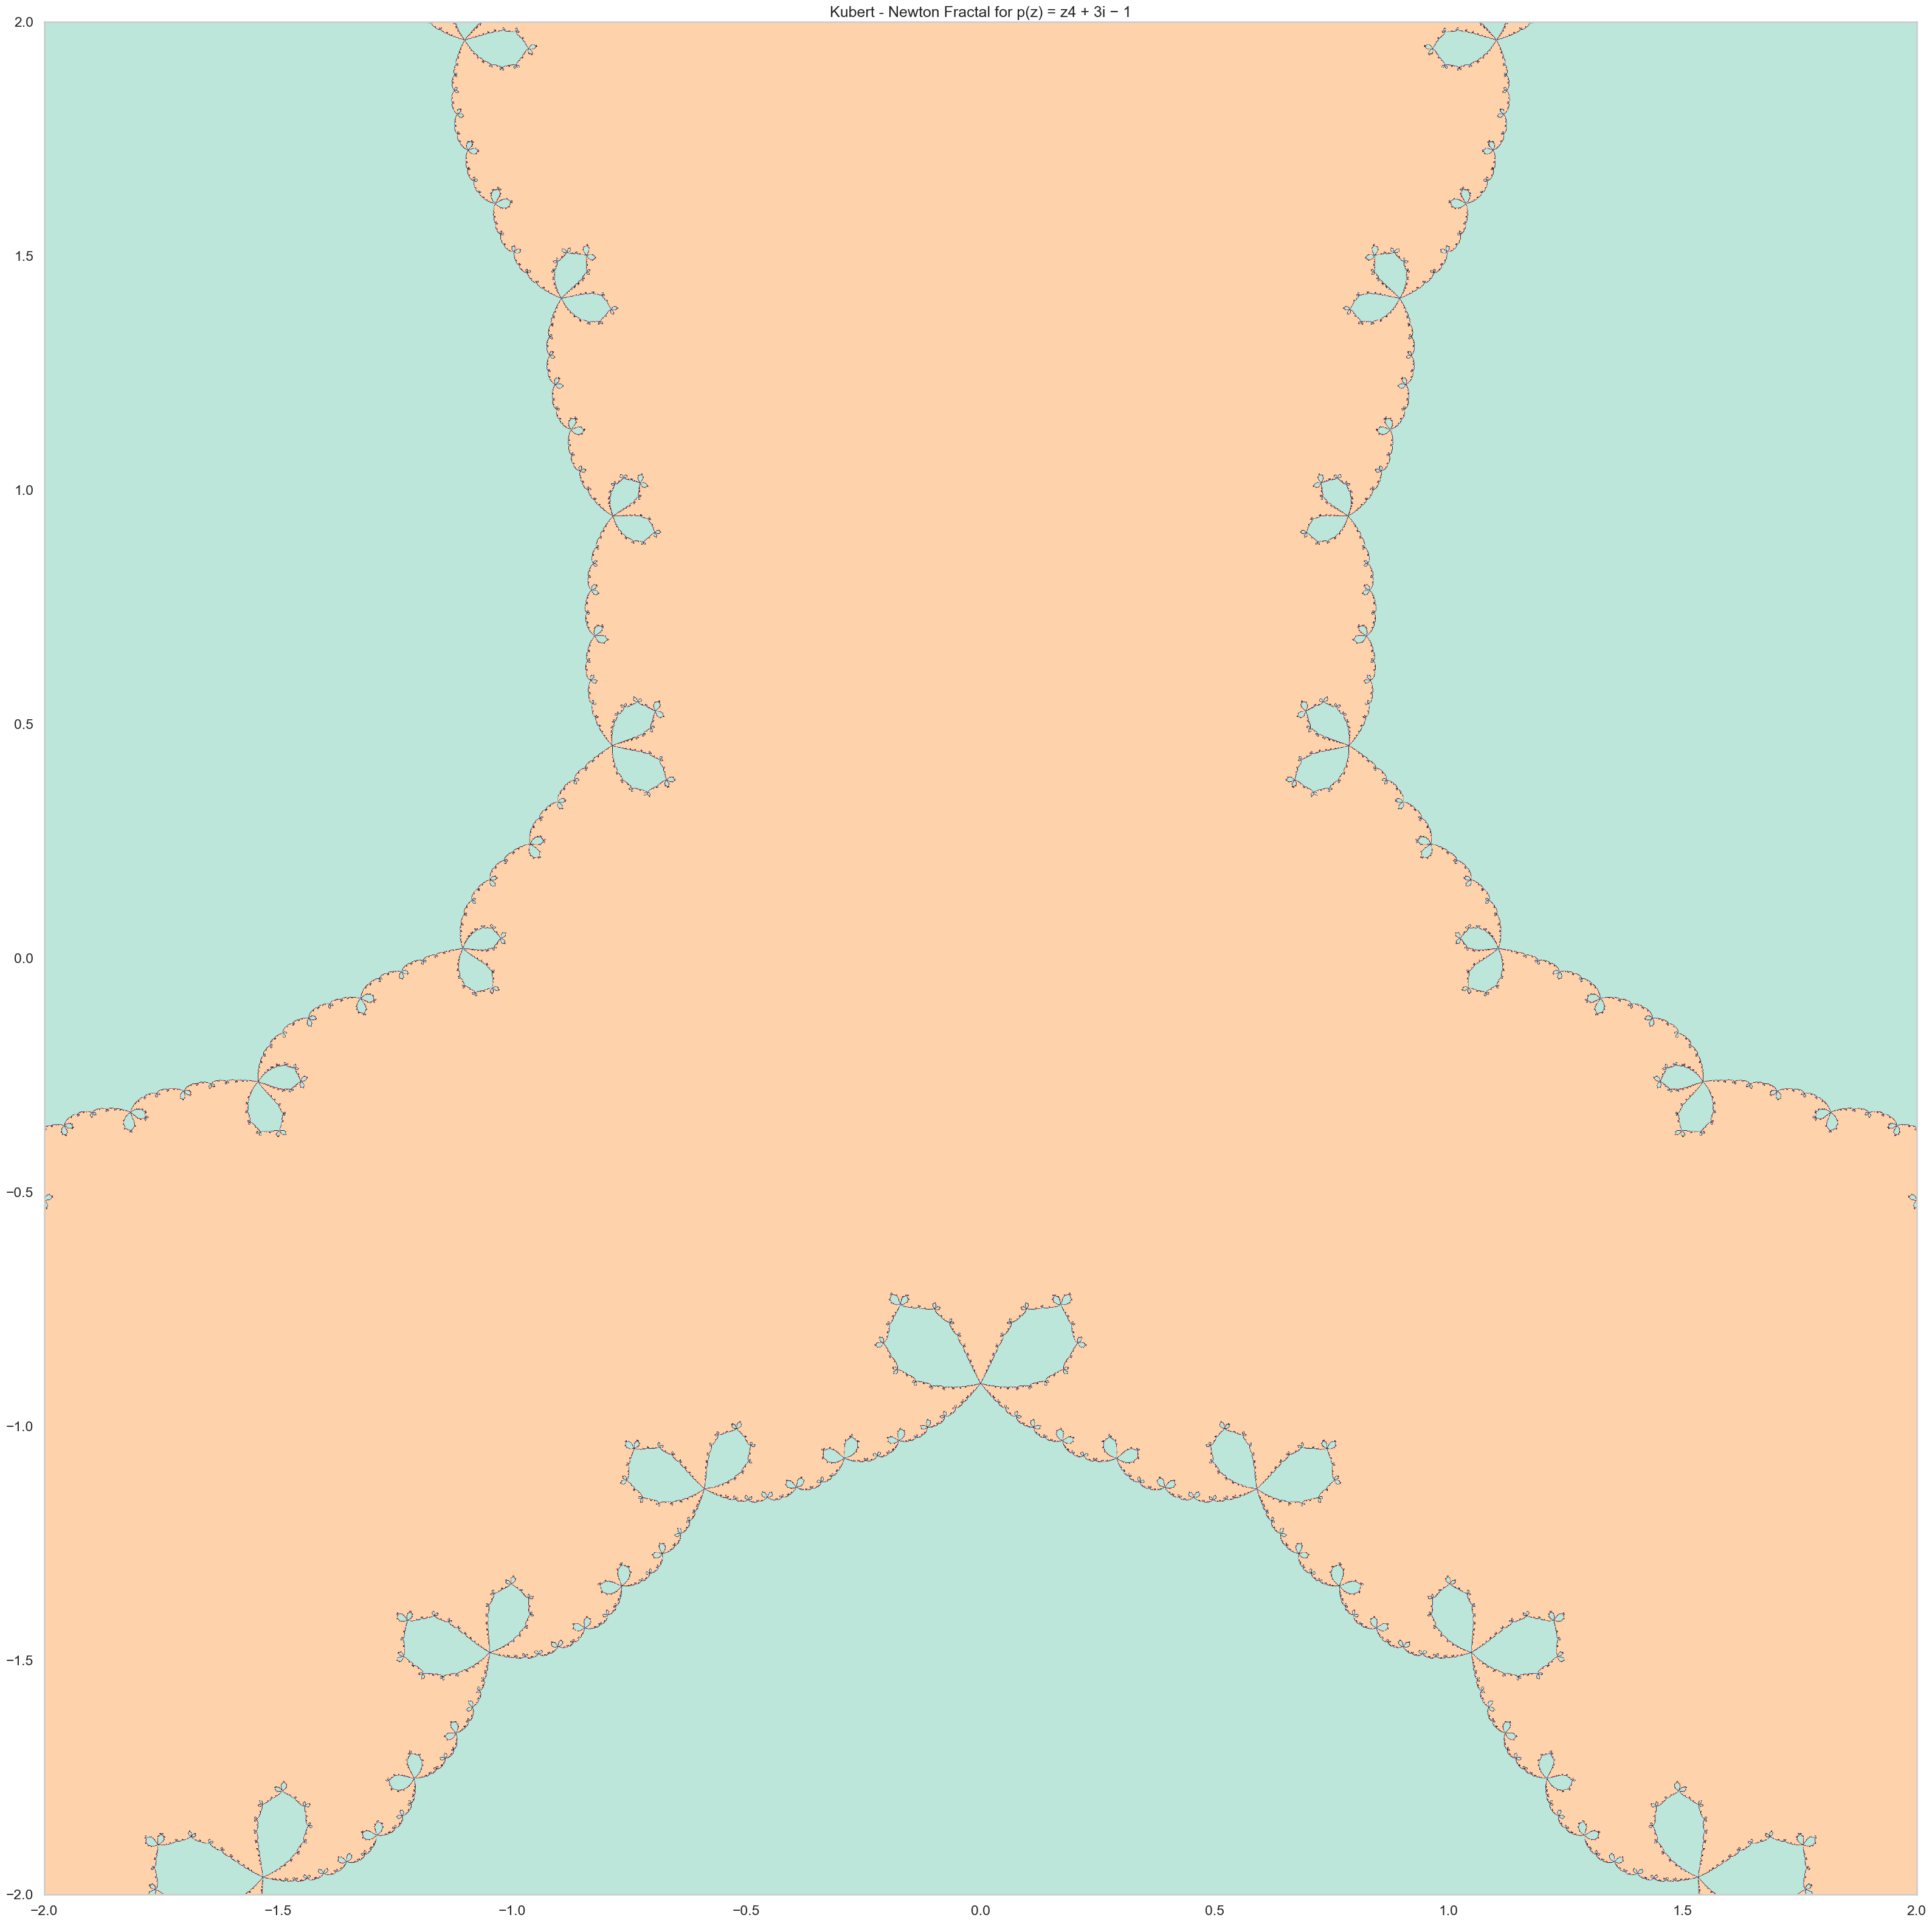

In [8]:
# Define the polynomial function and its derivative
def p(z):
    return z**4 + 3j*z - 1

def p_prime(z):
    return 4*z**3 + 3j

# Use scipy to find the roots numerically
initial_guesses = [1 + 0j, -1 + 0j, 0.5 + 0.5j, -0.5 - 0.5j]

roots_p = [opt.newton(p, guess, fprime=p_prime, tol=1e-6) for guess in initial_guesses]

# Set the parameters for the fractal
xmin, xmax, ymin, ymax = -2, 2, -2, 2
width, height = 4400, 4400
max_iter = 100

# Generate the fractal
fractal = newton_fractal(xmin, xmax, ymin, ymax, width, height, p, p_prime, roots_p, max_iter)

# Visualize the fractal
plt.figure(figsize=(40, 40))
plt.imshow(fractal, extent=(xmin, xmax, ymin, ymax), cmap=sns.color_palette("icefire", as_cmap=True))
plt.grid(False) 
#plt.colorbar()
plt.title("Kubert - Newton Fractal for p(z) = z4 + 3i − 1")
plt.savefig("newton_fractal_2.png",dpi=150)
plt.show()